# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalizaiton error. Don't tweak your model again, you would start overfitting the test set.

## Example: Articles categorization

### Objectives

Build a model to determine the categories of articles. 

### Get Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [3]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [4]:
bbc.sample(5)

,category,text
1610,entertainment,actress roberts takes spider role actress juli...
1458,politics,what the election should really be about a ge...
69,business,indonesia declines debt freeze indonesia no ...
1663,sport,robben sidelined with broken foot chelsea wing...
1979,business,india s maruti sees profits jump india s bigge...


In [5]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
bbc.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,ferguson rues failure to cut gap boss sir alex...
freq,511,2


In [7]:
# Your code here
bbc['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

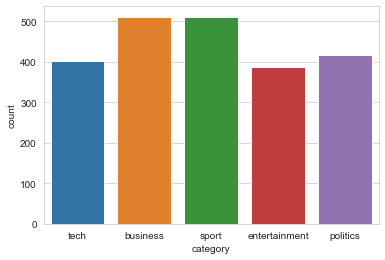

In [8]:
sns.countplot(bbc.category)

In [10]:
from collections import Counter

vocab = Counter()
for twit in bbc.text:
    for word in twit.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('', 65553),
 ('the', 52567),
 ('to', 24955),
 ('of', 19947),
 ('and', 18561),
 ('a', 18251),
 ('in', 17570),
 ('s', 9007),
 ('for', 8884),
 ('is', 8515),
 ('that', 8135),
 ('it', 7584),
 ('on', 7460),
 ('was', 6016),
 ('he', 5933),
 ('be', 5765),
 ('with', 5313),
 ('said', 5072),
 ('as', 4976),
 ('has', 4952)]

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ndtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

vocab_reduced = Counter()

for w, c in vocab.items():
    if not w in stop_words:
        vocab_reduced[w]=c

vocab_reduced.most_common(20)

[('', 65553),
 ('said', 5072),
 ('-', 3195),
 ('mr', 2992),
 ('would', 2574),
 ('also', 2154),
 ('people', 1970),
 ('new', 1957),
 ('us', 1786),
 ('one', 1705),
 ('could', 1509),
 ('said.', 1499),
 ('year', 1396),
 ('last', 1380),
 ('first', 1277),
 ('.', 1171),
 ('two', 1161),
 ('government', 1085),
 ('world', 1076),
 ('uk', 993)]

In [13]:
import re
def preprocessor(text):
    
    text = re.sub('<.*?>', '', text)
    
    
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [14]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [16]:
from sklearn.model_selection import train_test_split

X = bbc['text']
y = bbc['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop_words,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocessor at 0x000001F8EC22D0D0>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer_porter at 0x000001F8EC22D1F0>)),
                ('clf', LogisticRegression(random_state=0))])

In [18]:
predictions = clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,predictions)

0.9820224719101124